<a href="https://colab.research.google.com/github/uogbonda/Market-Analysis-using-Correlation-and-Regression-analysis/blob/main/Products%2C_Campaign_and_Customer_Analysis__22nd_November.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressionn on Customer dataset with number of purchases from catalog, stores etc: Customer Segmentation using Education status

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
import datetime as dt



In [ ]:

Current_Date = dt.datetime.today()
print (Current_Date)

2022-11-25 09:51:57.315717


In [ ]:

Previous_Date = dt.datetime.today() - dt.timedelta(days=58)
print (Previous_Date)

2022-09-28 09:51:59.832932


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Original_2240_customer_data.xlsx to Original_2240_customer_data (1).xlsx


In [ ]:
data=pd.read_excel('Original_2240_customer_data.xlsx')
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
data.shape

(2240, 29)

In [ ]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2020-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2022-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2021-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2022-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2022-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
data.Dt_Customer.dtypes

dtype('<M8[ns]')

In [ ]:
data.rename(columns = {'NumWebVisitsMonth' : 'Frequency'}, inplace = True)


In [ ]:
data['Monetary']=(data['MntWines']+ data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds'])
#data["Education_Status"] = data[["Education", "Marital_Status"]].apply("_".join, axis=1)

data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Monetary
0,5524,1957,Graduation,Single,58138.0,0,0,2020-09-04,58,635,...,0,0,0,0,0,0,3,11,1,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2022-03-08,38,11,...,0,0,0,0,0,0,3,11,0,27
2,4141,1965,Graduation,Together,71613.0,0,0,2021-08-21,26,426,...,0,0,0,0,0,0,3,11,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,2022-02-10,26,11,...,0,0,0,0,0,0,3,11,0,53
4,5324,1981,PhD,Married,58293.0,1,0,2022-01-19,94,173,...,0,0,0,0,0,0,3,11,0,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2021-06-13,46,709,...,0,0,0,0,0,0,3,11,0,1341
2236,4001,1946,PhD,Together,64014.0,2,1,2022-06-10,56,406,...,0,0,0,1,0,0,3,11,0,444
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2022-01-25,91,908,...,0,1,0,0,0,0,3,11,0,1241
2238,8235,1956,Master,Together,69245.0,0,1,2022-01-24,8,428,...,0,0,0,0,0,0,3,11,0,843


In [ ]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
Frequency               0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Monetary                0
dtype: int64

In [ ]:
data.Income.unique()
#data.shape

array([58138., 46344., 71613., ..., 56981., 69245., 52869.])

## Better way to calculate date is:**

If you have a column with only birth of year of customer, need you datetime with year to calculate

1.   today=date.today()
2.   data['Age']= cars.Year.apply(lambda x: today.year - x)
3.   data.head() 



In [ ]:
data['Age']=2022 - data['Year_Birth']
data.Age.unique()



array([ 65,  68,  57,  38,  41,  55,  51,  37,  48,  72,  39,  46,  63,
        70,  35,  76,  42,  73,  40,  43,  71,  53,  36,  33,  59,  52,
        49,  79,  47,  26,  54,  58,  45,  44,  67,  56,  34,  74,  64,
        50,  62,  77,  31,  60,  69,  61,  66,  30, 122, 129,  32,  75,
       123,  29,  28,  81,  78,  27,  82])

## Replace values in a column..need to put inplace=True.

In [ ]:

data.replace({'Age' : { 122 : 0, 129 : 0, 123: 0}}, inplace=True)
# Replace multiple values
#data.Age = data['Age'].replace(['122','0'],['129','0'], ['123','0'])
data.Age.unique()


array([65, 68, 57, 38, 41, 55, 51, 37, 48, 72, 39, 46, 63, 70, 35, 76, 42,
       73, 40, 43, 71, 53, 36, 33, 59, 52, 49, 79, 47, 26, 54, 58, 45, 44,
       67, 56, 34, 74, 64, 50, 62, 77, 31, 60, 69, 61, 66, 30,  0, 32, 75,
       29, 28, 81, 78, 27, 82])

In [ ]:
#Descriptive Statistics (Age)
data.Age.describe()

count    2240.000000
mean       53.027232
std        11.854284
min         0.000000
25%        45.000000
50%        52.000000
75%        63.000000
max        82.000000
Name: Age, dtype: float64

In [ ]:
# Age distribution plot, taking observations which have monetary value less than 53
import seaborn as sns
#x = data['Age'].query('Age < 53')['Age']

#ax = sns.distplot(x)

#sns.countplot(y='Age',data=data).set(title="Customers with kids")

[Text(0.5, 1.0, 'Customers with kids')]

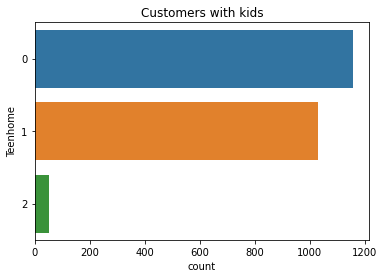

In [ ]:
sns.countplot(y='Teenhome',data=data).set(title="Customers with kids")

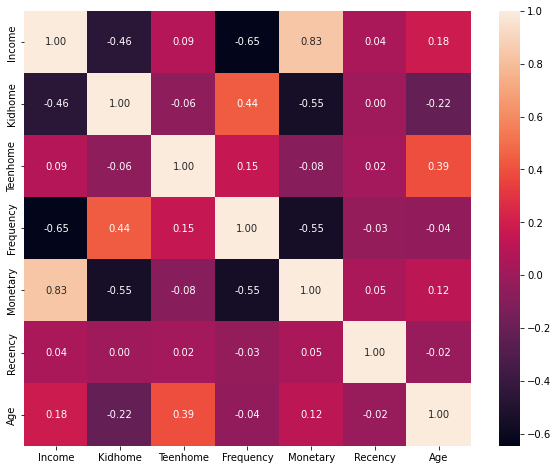

In [ ]:
#lets check the correlation between variables through heatmap

import matplotlib.pyplot as plt

corr = df_2020_Kids.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True,fmt='.2f')
plt.show()

* Negative correlation between Kidhome and Income : 46%
* Negative correlation between Frequency and Income : 65%
* Negative correlation between Frequncy, Kidhome and Income : 55%
* Negative correlation between Frequency and Monetary : 55%




## Exploratory Data Analysis (EDA) and Statistical Analysis

<b> A Exploring and Understanding basics data </b>

1. Know the data distribution across the education category.
2. What are the different sales associated with their purchases (Using Categorical Mean)

<b> B Statistical Analysis - Answering the Questions</b>
1. The impact of the number of purcahses on Sales (Using Correlation and Regression).

2. How web, store and catalog purchases can affect sales (Broken down Question 1 and Question 2 based on Account Type(Education))

#### Understanding of distrubtions


* Statistical analysis from Marital_Status. Distribution of our customers are first from:
* Single

*   Together
*   Married
* Divorced
* Widow
* Alone
* Absurd
* YOLO





next is:

In [ ]:
data['Education'].value_counts(normalize=True)

Graduation    0.503125
PhD           0.216964
Master        0.165179
2n Cycle      0.090625
Basic         0.024107
Name: Education, dtype: float64

In [ ]:
df=(data.groupby('Education')['Marital_Status'])
df.value_counts(normalize=True)

Education   Marital_Status
2n Cycle    Married           0.399015
            Together          0.280788
            Single            0.182266
            Divorced          0.113300
            Widow             0.024631
Basic       Married           0.370370
            Single            0.333333
            Together          0.259259
            Divorced          0.018519
            Widow             0.018519
Graduation  Married           0.384206
            Together          0.253771
            Single            0.223602
            Divorced          0.105590
            Widow             0.031056
            Absurd            0.000887
            Alone             0.000887
Master      Married           0.372973
            Together          0.286486
            Single            0.202703
            Divorced          0.100000
            Widow             0.032432
            Absurd            0.002703
            Alone             0.002703
PhD         Married           0.39506

## Drop column

In [ ]:
data.drop(columns=['Year_Birth'],inplace=True)
data.head(2)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Monetary,Age
0,5524,Graduation,Single,58138.0,0,0,2020-09-04,58,635,88,...,0,0,0,0,0,3,11,1,1617,65
1,2174,Graduation,Single,46344.0,1,1,2022-03-08,38,11,1,...,0,0,0,0,0,3,11,0,27,68


In [ ]:
pd.crosstab(data['Kidhome'],data['Education'],margins=True,normalize='columns')

Education,2n Cycle,Basic,Graduation,Master,PhD,All
Kidhome,,,,,,
0,0.536946,0.37037,0.576752,0.570270,0.623457,0.577232
1,0.448276,0.62963,0.401952,0.405405,0.351852,0.401339
2,0.014778,0.00000,0.021295,0.024324,0.024691,0.021429


In [ ]:
pd.crosstab(data['Teenhome'],data['Education'],margins=True,normalize='columns')

Education,2n Cycle,Basic,Graduation,Master,PhD,All
Teenhome,,,,,,
0,0.596059,0.907407,0.526176,0.489189,0.440329,0.516964
1,0.399015,0.092593,0.453416,0.486486,0.520576,0.459821
2,0.004926,0.000000,0.020408,0.024324,0.039095,0.023214


In [ ]:
pd.crosstab(data['Kidhome'],data['MntSweetProducts'],margins=True,normalize='columns').mean()

MntSweetProducts
0      0.333333
1      0.333333
2      0.333333
3      0.333333
4      0.333333
         ...   
197    0.333333
198    0.333333
262    0.333333
263    0.333333
All    0.333333
Length: 178, dtype: float64

33.3% spent on sweets in 2 years.

In [ ]:
data.groupby('Education').mean()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Monetary,Age
Education,,,,,,,,,,,,,,,,,,,,,
2n Cycle,5588.211823,47633.190000,0.477833,0.408867,48.418719,198.182266,28.955665,141.256158,47.482759,34.251232,...,0.049261,0.049261,0.068966,0.009852,0.019704,3.0,11.0,0.108374,496.527094,48.738916
Basic,5396.407407,20306.259259,0.629630,0.092593,48.444444,7.240741,11.111111,11.444444,17.055556,12.111111,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.037037,81.796296,44.537037
Graduation,5652.523514,52720.373656,0.444543,0.494232,50.035492,284.268855,30.774623,179.488909,43.149956,31.367347,...,0.071872,0.076309,0.072760,0.014197,0.012422,3.0,11.0,0.134871,619.898846,52.364685
Master,5403.648649,52917.534247,0.454054,0.535135,47.586486,333.075676,21.654054,163.378378,32.100000,21.175676,...,0.083784,0.075676,0.048649,0.005405,0.005405,3.0,11.0,0.154054,611.781081,55.121622
PhD,5619.096708,56145.313929,0.401235,0.598765,48.483539,404.495885,20.049383,168.602881,26.728395,20.222222,...,0.092593,0.080247,0.061728,0.020576,0.002058,3.0,11.0,0.207819,672.409465,55.703704


In [ ]:
data.corr()[['Income']]

,Income
ID,0.013095
Income,1.000000
Kidhome,-0.428669
Teenhome,0.019133
Recency,-0.003970
MntWines,0.578650
MntFruits,0.430842
MntMeatProducts,0.584633
MntFishProducts,0.438871
MntSweetProducts,0.440744


In [ ]:
data.corr()[['Monetary']]


,Monetary
ID,-0.018054
Income,0.667576
Kidhome,-0.556669
Teenhome,-0.138384
Recency,0.020433
MntWines,0.891839
MntFruits,0.614229
MntMeatProducts,0.842965
MntFishProducts,0.642818
MntSweetProducts,0.603016


## **Correlation Analysis**

**Date Subtraction... Old from new.**

In [ ]:
## Consolidated Strategy for Targeting
        
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)
correlation_analysis=pd.DataFrame(data[['Monetary', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases']].corr()['Monetary']).reset_index()
correlation_analysis.columns=['Impacting Variable','Degree of Linear Impact (Correlation)']
correlation_analysis=correlation_analysis[correlation_analysis['Impacting Variable']!='Monetary']
correlation_analysis=correlation_analysis.sort_values('Degree of Linear Impact (Correlation)',ascending=False)
correlation_analysis.style.background_gradient(cmap=cm).set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  if __name__ == '__main__':


,Impacting Variable,Degree of Linear Impact (Correlation)
3,NumCatalogPurchases,0.78
4,NumStorePurchases,0.67
2,NumWebPurchases,0.52
1,NumDealsPurchases,-0.07


## **Market Strategy Impact on Campaigns (Broken by different account type)**

In [ ]:
# Import seaborn library
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)
correlation_analysis=pd.DataFrame(data.groupby('Education')[['Monetary', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases'
]].corr()['Monetary']).reset_index()
correlation_analysis=correlation_analysis.sort_values(['Education','Monetary'],ascending=False)
correlation_analysis.columns=['Acc Type','Variable Impact on Sales','Impact']
correlation_analysis=correlation_analysis[correlation_analysis['Variable Impact on Sales']!='Monetary'].reset_index(drop=True)
correlation_analysis.style.background_gradient(cmap=cm).set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  if __name__ == '__main__':


,Acc Type,Variable Impact on Sales,Impact
0,PhD,NumCatalogPurchases,0.73
1,PhD,NumStorePurchases,0.59
2,PhD,NumWebPurchases,0.46
3,PhD,NumDealsPurchases,-0.04
4,Master,NumCatalogPurchases,0.79
5,Master,NumStorePurchases,0.74
6,Master,NumWebPurchases,0.47
7,Master,NumDealsPurchases,-0.09
8,Graduation,NumCatalogPurchases,0.79
9,Graduation,NumStorePurchases,0.67


## **Regression Analysis (Market Sales and Strategies)**

In [ ]:
data.NumStorePurchases.mean()

5.790178571428571

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data.columns=[mystring.replace(" ", "_") for mystring in data.columns]
data.columns=[mystring.replace("(", "") for mystring in data.columns]
data.columns=[mystring.replace(")", "") for mystring in data.columns]

results = smf.ols('Monetary ~ NumWebPurchases + NumCatalogPurchases  + NumStorePurchases', data=data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Monetary   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     1952.
Date:                Fri, 25 Nov 2022   Prob (F-statistic):               0.00
Time:                        09:54:47   Log-Likelihood:                -16075.
No. Observations:                2240   AIC:                         3.216e+04
Df Residuals:                    2236   BIC:                         3.218e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -166.4962    

### The hypothesis is that the properties are linear. so we use linear_rainbow to see this or check if it is.

In [ ]:
print(results.params)
print("=======================================")
print(results.rsquared)

Intercept             -166.496232
NumWebPurchases         33.242130
NumCatalogPurchases    115.730732
NumStorePurchases       56.721026
dtype: float64
0.7236399935870768


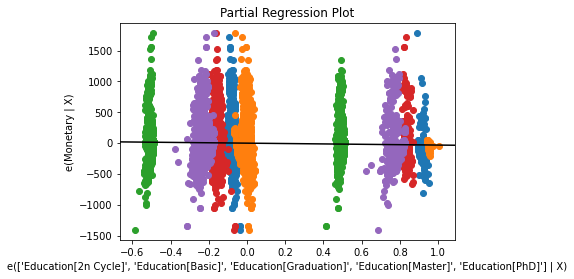

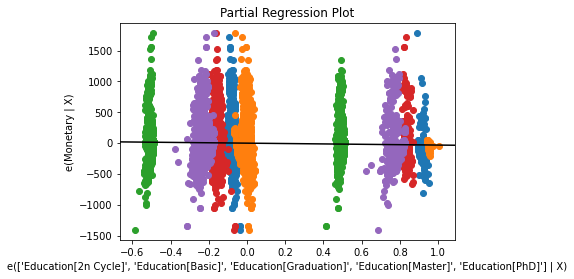

In [ ]:
sm.graphics.plot_partregress('Monetary', 'Education',['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'], data=data, obs_labels=False )

# Can use any columns to compare "Monetary" with......x is Monetary and y is Response.

## we used this to bring the Regression table into pandas dataframe for the next type.


In [ ]:
df = pd.read_html(results.summary().tables[1].as_html(),header=0,index_col=0)[0]


### Next, check columns that have P-values less than 0.95....Looking up on the Regression table (y=mx +b), campaign phone had 0.94 in column **P > |t|**

In [ ]:
df=df.reset_index()
df=df[df['P>|t|']<0.05][['index','coef']]
df

,index,coef
0,Intercept,-166.4962
1,NumWebPurchases,33.2421
2,NumCatalogPurchases,115.7307
3,NumStorePurchases,56.7210


## Regression Analysis (Market Sales and Strategies) - Broken for different account types

In [ ]:
consolidated_summary=pd.DataFrame()
for acctype in list(set(list(data['Education']))):
    temp_data=data[data['Education']==acctype].copy()
    results = smf.ols('Monetary ~ NumWebPurchases + NumCatalogPurchases  + NumStorePurchases', data=temp_data).fit()
    df = pd.read_html(results.summary().tables[1].as_html(),header=0,index_col=0)[0].reset_index()
    df=df[df['P>|t|']<0.05][['index','coef']]
    df.columns=['Variable','Coefficent (Impact)']
    df['Account Type']=acctype
    df=df.sort_values('Coefficent (Impact)',ascending=False)
    df=df[df['Variable']!='Intercept']
    print(acctype)
    consolidated_summary=consolidated_summary.append(df)
    print(df)
    #print(results.summary())
    

Graduation
              Variable  Coefficent (Impact) Account Type
2  NumCatalogPurchases             117.6223   Graduation
3    NumStorePurchases              51.7242   Graduation
1      NumWebPurchases              38.3948   Graduation
PhD
              Variable  Coefficent (Impact) Account Type
2  NumCatalogPurchases             109.2442          PhD
3    NumStorePurchases              56.3508          PhD
1      NumWebPurchases              32.5847          PhD
Basic
              Variable  Coefficent (Impact) Account Type
1      NumWebPurchases              49.9737        Basic
2  NumCatalogPurchases              40.3983        Basic
3    NumStorePurchases              35.3071        Basic
2n Cycle
              Variable  Coefficent (Impact) Account Type
2  NumCatalogPurchases              98.0597     2n Cycle
3    NumStorePurchases              50.3042     2n Cycle
1      NumWebPurchases              38.2408     2n Cycle
Master
              Variable  Coefficent (Impact) Account

### Next, is to get the individual OLS Regression for education

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
consolidated_summary=pd.DataFrame()
for acctype in list(set(list(data['Education']))):
    print(acctype)
    temp_data=data[data['Education']==acctype].copy()
    results = smf.ols('Monetary ~  NumWebPurchases + NumCatalogPurchases  + NumStorePurchases', data=temp_data).fit()
    df = pd.read_html(results.summary().tables[1].as_html(),header=0,index_col=0)[0].reset_index()
    df=df[df['P>|t|']<0.05][['index','coef']]
    df.columns=['Variable','Coefficent (Impact)']
    df['Account Type']=acctype
    df=df.sort_values('Coefficent (Impact)',ascending=False)
    df=df[df['Variable']!='Intercept']
    consolidated_summary=consolidated_summary.append(df)
    print(results.summary())
    

Graduation
                            OLS Regression Results                            
Dep. Variable:               Monetary   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     1063.
Date:                Fri, 25 Nov 2022   Prob (F-statistic):               0.00
Time:                        09:55:18   Log-Likelihood:                -8049.0
No. Observations:                1127   AIC:                         1.611e+04
Df Residuals:                    1123   BIC:                         1.613e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -1

# Final Recommendations

Using the below table we can use the coefficent to see how much return we can derive from each dollar we spend, here we can clearly see that for different account type (Education), the best purchases for these clients. Offering discounted deals , has a negative effect on sales.

<b>Number of purchases (Web, Store and Catalog) - Master </b><br>
These clients have positive correlation with purchasing from the store and Catalogs. for each dollar of sales, there is a ROI of 129 US dollar from Catalog, 75 US dollar ROI from store purchases.





In [ ]:
consolidated_summary

,Variable,Coefficent (Impact),Account Type
2,NumCatalogPurchases,117.6223,Graduation
3,NumStorePurchases,51.7242,Graduation
1,NumWebPurchases,38.3948,Graduation
2,NumCatalogPurchases,109.2442,PhD
3,NumStorePurchases,56.3508,PhD
1,NumWebPurchases,32.5847,PhD
1,NumWebPurchases,49.9737,Basic
2,NumCatalogPurchases,40.3983,Basic
3,NumStorePurchases,35.3071,Basic
2,NumCatalogPurchases,98.0597,2n Cycle


In [ ]:
consolidated_summary.reset_index(inplace=True)
consolidated_summary.drop('index',inplace=True,axis=1)

In [ ]:
consolidated_summary.columns = ['Variable','Return on Investment','Account Type']
consolidated_summary['Return on Investment']= consolidated_summary['Return on Investment'].apply(lambda x: round(x,1))
consolidated_summary.style.background_gradient(cmap='RdYlGn')

,Variable,Return on Investment,Account Type
0,NumCatalogPurchases,117.600000,Graduation
1,NumStorePurchases,51.700000,Graduation
2,NumWebPurchases,38.400000,Graduation
3,NumCatalogPurchases,109.200000,PhD
4,NumStorePurchases,56.400000,PhD
5,NumWebPurchases,32.600000,PhD
6,NumWebPurchases,50.000000,Basic
7,NumCatalogPurchases,40.400000,Basic
8,NumStorePurchases,35.300000,Basic
9,NumCatalogPurchases,98.100000,2n Cycle


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
def format(x):
        return "${:.1f}".format(x)
consolidated_summary['Return on Investment']  = consolidated_summary['Return on Investment'].apply(format)

In [ ]:
consolidated_summary.columns = ['Variable','Return on Investment','Account Type']
consolidated_summary.style.background_gradient(cmap='RdYlGn')

,Variable,Return on Investment,Account Type
0,NumCatalogPurchases,$117.6,Graduation
1,NumStorePurchases,$51.7,Graduation
2,NumWebPurchases,$38.4,Graduation
3,NumCatalogPurchases,$109.2,PhD
4,NumStorePurchases,$56.4,PhD
5,NumWebPurchases,$32.6,PhD
6,NumWebPurchases,$50.0,Basic
7,NumCatalogPurchases,$40.4,Basic
8,NumStorePurchases,$35.3,Basic
9,NumCatalogPurchases,$98.1,2n Cycle


In [ ]:
consolidated_summary.to_csv('consolidated_summary.csv')
files.download('consolidated_summary.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(X,y)

LinearRegression()

In [ ]:
lr.coef_

array([[ 33.24213018, 115.7307321 ,  56.72102649]])